# Open Dataset and visualize images

Dataset size: 1


TypeError: 'AxesSubplot' object is not subscriptable

<Figure size 432x288 with 0 Axes>

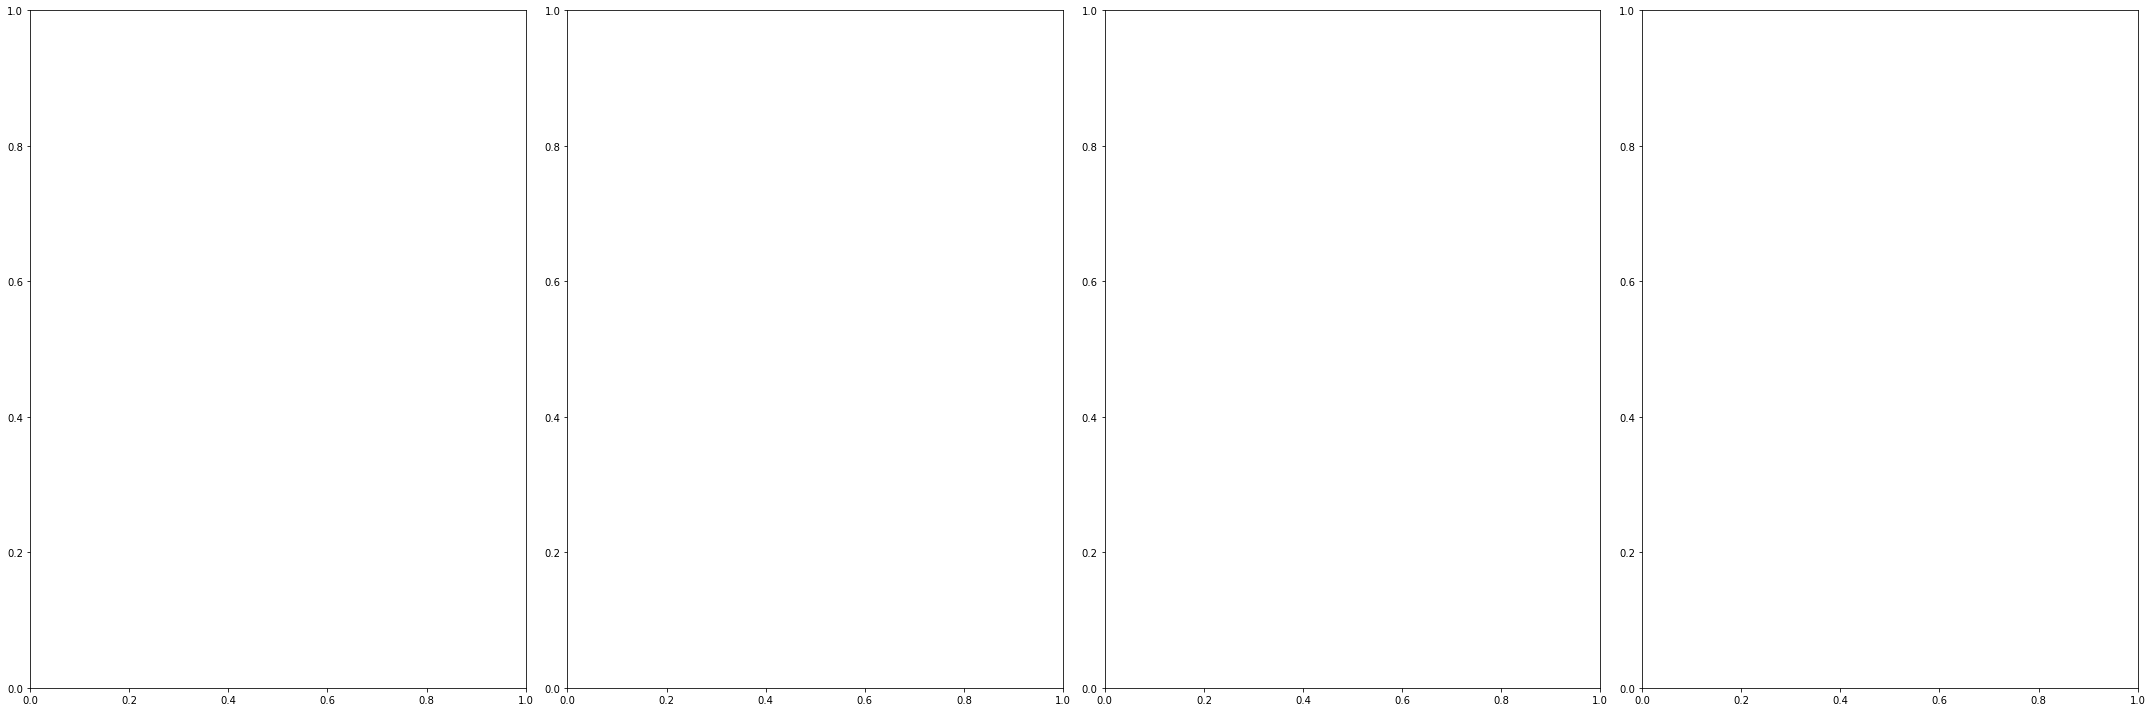

In [9]:
from dataset.dataset_interface import DatasetInterface
from matplotlib import pyplot as plt
from pathlib import Path
from utils.visualization_utils import to_rgb, visualize_depth
from utils.transformation_utils import imgs_to_pcd, rs_ci, zv_ci
import numpy as np
import open3d as o3d

dir_to_visualize = Path("../../src")
# dir_to_visualize = Path("../../resources/images/calibrated/3d_aligned_not_cropped/dataset_3")
pcd_first = False

dataset_interface = DatasetInterface(dir_to_visualize)
dataset_interface_list = dataset_interface[:10]
print(f"Dataset size: {len(dataset_interface_list)}")

plt.figure()
f, axarr = plt.subplots(len(dataset_interface_list), 4, figsize=(30, 10 * len(dataset_interface_list)))
f.tight_layout()

mask = np.zeros((1080, 1920), dtype=np.uint8)
for i, (rs_rgb, rs_depth, zv_rgb, zv_depth) in enumerate(dataset_interface_list):
    if i == 0 and pcd_first:
        rs_pcd = imgs_to_pcd(rs_rgb, rs_depth, rs_ci)
        # zv_pcd = imgs_to_pcd(zv_rgb, zv_depth, rs_ci)
        zv_pcd = imgs_to_pcd(zv_rgb, zv_depth, zv_ci)
        o3d.visualization.draw_geometries([rs_pcd, zv_pcd])
    plt.imsave("rgb.png", to_rgb(rs_rgb))
    axarr[i][0].set_title(dataset_interface.data_file_paths[i])
    axarr[i][0].imshow(to_rgb(rs_rgb))
    axarr[i][1].imshow(visualize_depth(rs_depth))
    axarr[i][2].imshow(to_rgb(zv_rgb))
    axarr[i][3].imshow(visualize_depth(zv_depth))

Dataset size: 18


<Figure size 432x288 with 0 Axes>

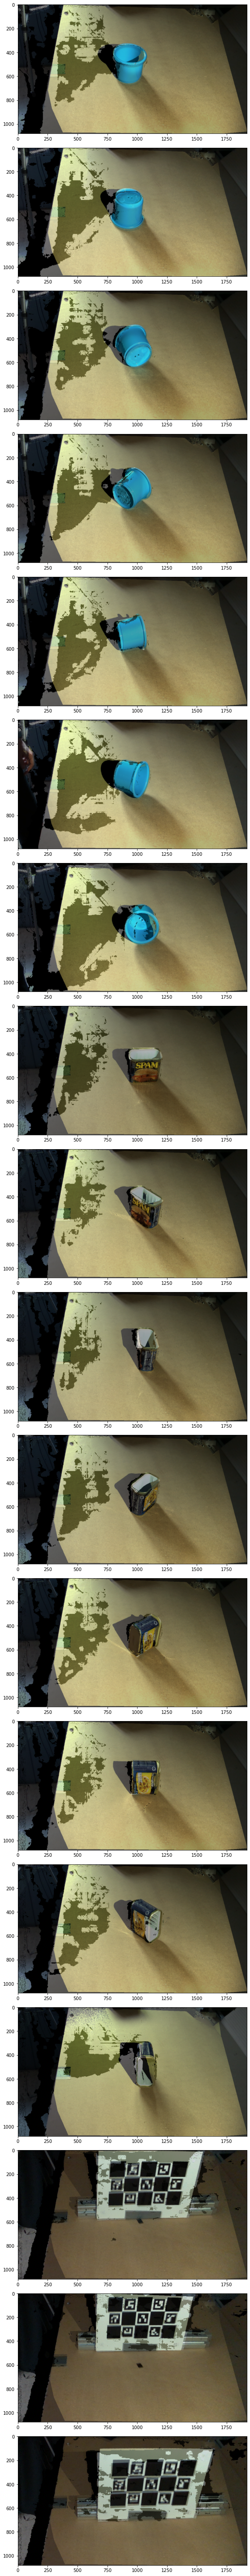

In [ ]:
from dataset.dataset_interface import DatasetInterface
from matplotlib import pyplot as plt
from pathlib import Path
from utils.visualization_utils import to_rgb, visualize_depth

# dataset_file = Path("../../resources/images/calibrated/undistorted_1.npz")
dir_to_visualize = Path("../../resources/images/calibrated/3d_aligned/dataset_1")

dataset_interface = DatasetInterface(dir_to_visualize)
print(f"Dataset size: {len(dataset_interface)}")

plt.figure()
f, axarr = plt.subplots(len(dataset_interface), 1, figsize=(30, 80))
f.tight_layout()

for i, (rs_rgb, rs_depth, zv_rgb, zv_depth) in enumerate(dataset_interface):
    axarr[i].imshow(to_rgb(cv2.addWeighted(rs_rgb, 0.5, zv_rgb, 0.5, 0)))

# Visualize Dataset Preprocessing

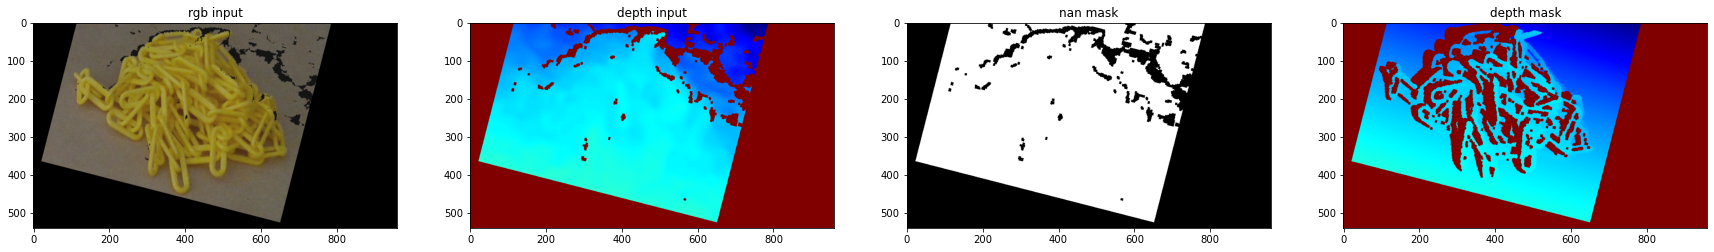

In [11]:
from dataset.dataset_interface import DatasetInterface
from pathlib import Path
from matplotlib import pyplot as plt
from dataset.data_loading import BasicDataset
import numpy as np
from utils.visualization_utils import visualize_depth, visualize_mask, to_rgb

dataset = BasicDataset(Path("../../resources/images/calibrated"),
                        scale=0.5, enable_augmentation=True, add_mask_for_nans=True)
set = dataset[np.random.randint(len(dataset), size=(1,)).item()]
image = set['image'].numpy()
mask = set['label'].numpy()

image = image.transpose((1, 2, 0))
rgb_image = image[..., :3]
depth_image = image[..., 3]
depth_mask = mask.transpose((1, 2, 0))
nan_mask = image[..., 4]


_, axarr = plt.subplots(1, 4, figsize=(30, 10))
axarr[0].title.set_text("rgb input")
axarr[0].imshow(to_rgb(rgb_image))
axarr[1].title.set_text("depth input")
axarr[1].imshow(visualize_depth(depth_image))
axarr[2].title.set_text("nan mask")
axarr[2].imshow(visualize_mask(nan_mask))
axarr[3].title.set_text("depth mask")
axarr[3].imshow(visualize_depth(depth_mask))

# Write Dataset Examples to disk

39 ../../resources/images/uncalibrated/dataset_4/1643105342.6934865.npz


True

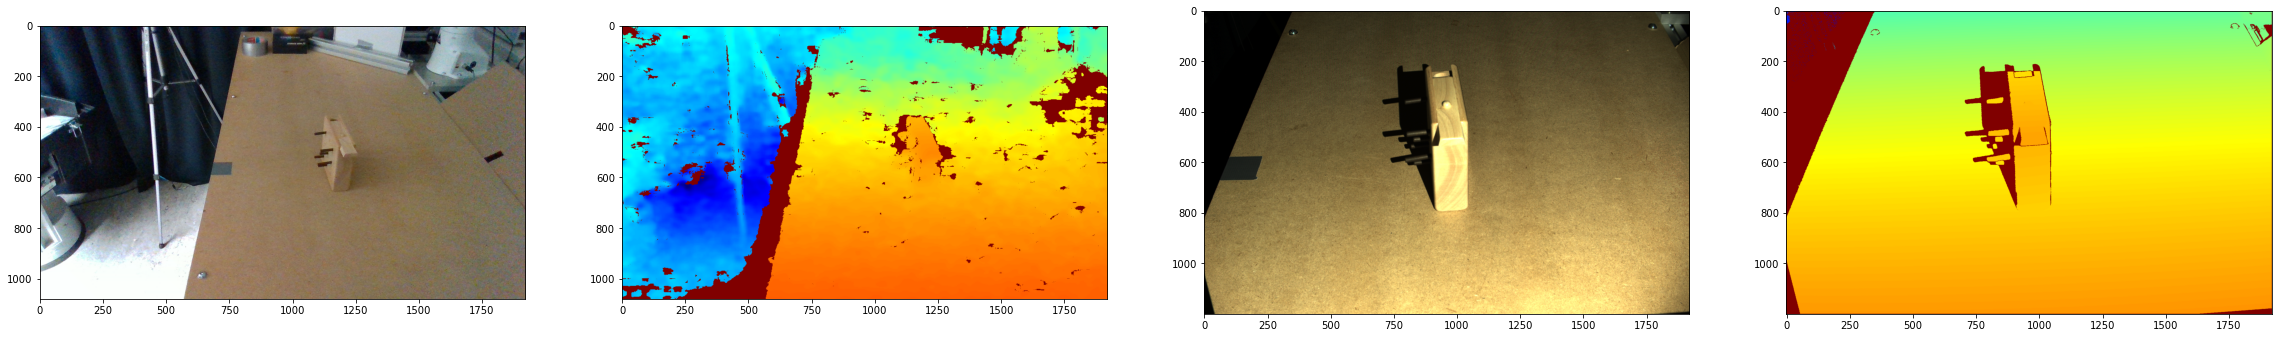

In [23]:
from dataset.dataset_interface import DatasetInterface
from utils.visualization_utils import visualize_depth
from matplotlib import pyplot as plt
from pathlib import Path
import numpy as np
import cv2

dataset = DatasetInterface(Path("../../resources/images/uncalibrated/dataset_4"))
idx = np.random.randint(len(dataset))
idx = 39
rs_rgb, rs_depth, zv_rgb, zv_depth = dataset[idx]
print(idx, dataset.data_file_paths[idx])

rs_depth = visualize_depth(rs_depth)
zv_depth = visualize_depth(zv_depth)

_, axarr = plt.subplots(1, 4, figsize=(40, 10))
axarr[0].imshow(cv2.cvtColor(rs_rgb, cv2.COLOR_BGR2RGB))
axarr[1].imshow(rs_depth)
axarr[2].imshow(cv2.cvtColor(zv_rgb, cv2.COLOR_BGR2RGB))
axarr[3].imshow(zv_depth)

cv2.imwrite("rs_rgb_plane.png", rs_rgb)
cv2.imwrite("rs_depth_plane.png", rs_depth)
cv2.imwrite("zv_rgb_plane.png", zv_rgb)
cv2.imwrite("zv_depth_plane.png", zv_depth)